In [3]:
%matplotlib inline
import reaction_models as rxn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from matplotlib.ticker import FormatStrFormatter

### Load data from simple physics regressed parameters

In [5]:
cwd = os.getcwd()
path = os.path.join(cwd,'regressed_params_sp')

csv_files = glob.glob(os.path.join(path,"*.csv"))
dict = {}

# loop over the list of csv files
for f in csv_files:
    
    # collect file name
    file_name =  f.split("\\")[-1]
    
    # read in .csv
    df = pd.read_csv(f, header = None).transpose()
    df = df.rename(columns={0: 'A1', 1: 'A2', 2: 'E1', 3:'E2'})
        
    # save dataframe to dictionary w/ key file_name
    key = file_name
    dict[key] = df

no_cases = 10
case = np.zeros(no_cases, dtype = int)
A1 = np.zeros(no_cases)
A2 = np.zeros(no_cases)
E1 = np.zeros(no_cases)
E2 = np.zeros(no_cases)

for j in np.arange(0, no_cases):
    case[j] = j + 1
    A1[j] = dict['fitted_parameters_simple_physics_'+str(case[j])+'.csv'].A1
    A2[j] = dict['fitted_parameters_simple_physics_'+str(case[j])+'.csv'].A2
    E1[j] = dict['fitted_parameters_simple_physics_'+str(case[j])+'.csv'].E1
    E2[j] = dict['fitted_parameters_simple_physics_'+str(case[j])+'.csv'].E2

data = {'case': case, 'A1': A1, 'A2': A2, 'E1': E1, 'E2': E2}
sp_params = pd.DataFrame(data)
sp_params

# save as csv
#sp_params.to_csv('fitted_parameters_simple_physics_master.csv')

,case,A1,A2,E1,E2
0,1,72.448290,49.507804,6.935788,12.492344
1,2,76.600171,10.396757,7.230669,7.513692
2,3,139.553241,88.739652,9.168945,14.244120
3,4,128.446729,31.224946,8.829378,11.261605
4,5,123.821545,5.535530,8.626742,5.943396
5,6,124.860947,107.160563,8.891237,14.778025
6,7,89.285271,27.945122,7.883856,10.946193
7,8,107.241241,44.968585,8.224972,12.476900
8,9,197.867993,4.666031,9.897156,6.461187
9,10,62.698517,183.592116,6.550067,16.606276


### Create dataframe of all control variables for each experiment from dictionary

In [6]:
cwd = os.getcwd()
path = os.path.join(cwd,'training_data_small_noise_full_physics_2')

csv_files = glob.glob(os.path.join(path,"*.csv"))
dict = {}

# loop over the list of csv files
for f in csv_files:
    
    # collect file name
    file_name =  f.split("\\")[-1]
    
    # read in .csv
    if file_name == "A_true.csv" or file_name == "E_true.csv":
        df = pd.read_csv(f, header = None)
    
    else:
        df = pd.read_csv(f)
        
    # save dataframe to dictionary w/ key file_name
    key = file_name
    dict[key] = df
    
no_exp = 20
exp = np.zeros(no_exp)
time = 0*exp
temp = 0*exp
CA0 = 0*exp

for j in range(no_exp):
    exp[j] = dict["rxn_exp_"+str(j)+".csv"].exp[0]
    time[j] = dict["rxn_exp_"+str(j)+".csv"].time[10]
    temp[j] = dict["rxn_exp_"+str(j)+".csv"].temp[0]
    CA0[j] = dict["rxn_exp_"+str(j)+".csv"].CA0[0]

data = {'exp': exp, 'time': time, 'temp': temp, 'CA0': CA0}
controls = pd.DataFrame(data)
controls.exp = np.arange(1,no_exp+1) # re-index to start at 1 and convert exp no. to integer value
controls

# save as csv
# controls.to_csv('controls_master.csv')

,exp,time,temp,CA0
0,1,1.0,324.65,2.3
1,2,1.0,468.65,3.5
2,3,1.0,387.65,1.5
3,4,1.0,351.65,4.9
4,5,1.0,297.65,4.7
5,6,1.0,315.65,4.5
6,7,1.0,396.65,1.9
7,8,1.0,414.65,2.9
8,9,1.0,405.65,2.5
9,10,1.0,369.65,1.1


### Create dataframe for experiments in each case study

In [9]:
# load case experiment list
exp_list = pd.read_csv('experiment_list.csv', header = None)
exp_list = exp_list.rename(columns={0: 'set_1', 1: 'set_2', 2: 'set_3', 3:'set_4'})
exp_list['case'] = np.arange(1, 11)
exp_list['set_1'] = exp_list['set_1'] + 1 # begin indexing experiments at 1
exp_list['set_2'] = exp_list['set_2'] + 1 
exp_list['set_3'] = exp_list['set_3'] + 1 
exp_list['set_4'] = exp_list['set_4'] + 1 
exp_list = exp_list[['case','set_1','set_2','set_3','set_4']]
exp_list

,case,set_1,set_2,set_3,set_4
0,1,10,14,19,1
1,2,3,4,12,18
2,3,7,13,6,11
3,4,5,15,16,1
4,5,17,12,11,16
5,6,20,15,13,5
6,7,2,6,20,16
7,8,8,17,20,18
8,9,9,5,16,1
9,10,13,14,11,9


### Simulate simple physics

====================== Case 1 ======================
-----------Exp.: 10-----------
k1=  7.585118
k2=  0.850032


<Figure size 432x288 with 0 Axes>

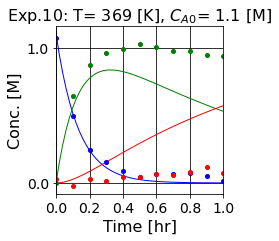

-----------Exp.: 14-----------
k1=  8.00308
k2=  0.936252


<Figure size 432x288 with 0 Axes>

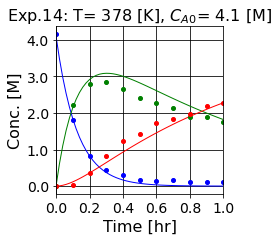

-----------Exp.: 19-----------
k1=  11.799411
k2=  1.883957


<Figure size 432x288 with 0 Axes>

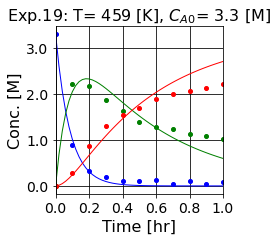

-----------Exp.: 1-----------
k1=  5.547721
k2=  0.483898


<Figure size 432x288 with 0 Axes>

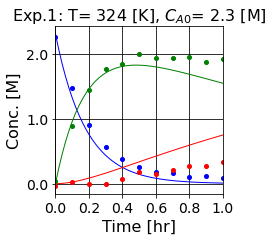

====================== Case 2 ======================
-----------Exp.: 3-----------
k1=  8.127154
k2=  1.010348


<Figure size 432x288 with 0 Axes>

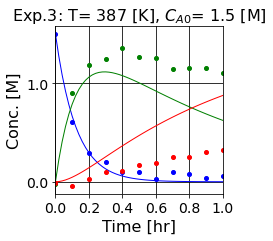

-----------Exp.: 4-----------
k1=  6.459455
k2=  0.795837


<Figure size 432x288 with 0 Axes>

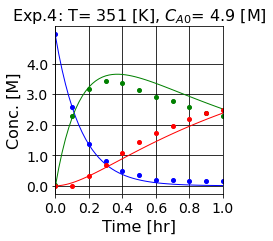

-----------Exp.: 12-----------
k1=  10.692121
k2=  1.343566


<Figure size 432x288 with 0 Axes>

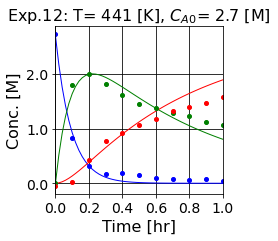

-----------Exp.: 18-----------
k1=  4.493498
k2=  0.545813


<Figure size 432x288 with 0 Axes>

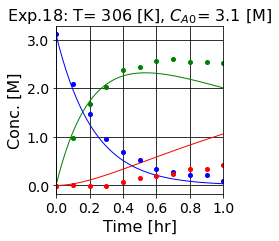

====================== Case 3 ======================
-----------Exp.: 7-----------
k1=  8.655849
k2=  1.181281


<Figure size 432x288 with 0 Axes>

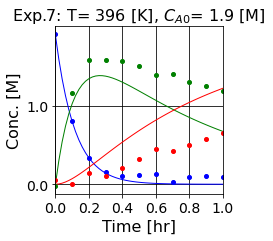

-----------Exp.: 13-----------
k1=  10.908818
k2=  1.692124


<Figure size 432x288 with 0 Axes>

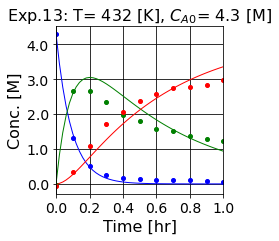

-----------Exp.: 6-----------
k1=  4.240987
k2=  0.389948


<Figure size 432x288 with 0 Axes>

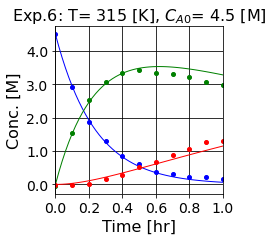

-----------Exp.: 11-----------
k1=  5.585017
k2=  0.598056


<Figure size 432x288 with 0 Axes>

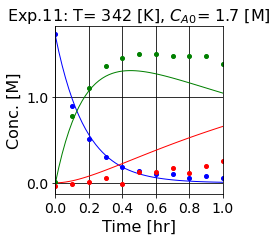

====================== Case 4 ======================
-----------Exp.: 5-----------
k1=  3.624804
k2=  0.329792


<Figure size 432x288 with 0 Axes>

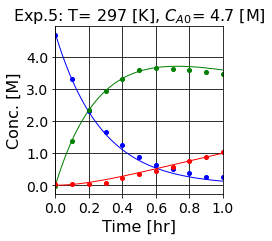

-----------Exp.: 15-----------
k1=  10.473969
k2=  1.276469


<Figure size 432x288 with 0 Axes>

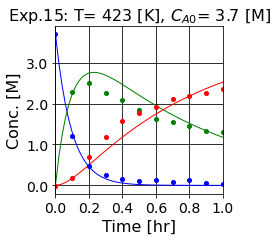

-----------Exp.: 16-----------
k1=  12.171211
k2=  1.545965


<Figure size 432x288 with 0 Axes>

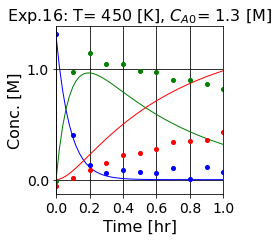

-----------Exp.: 1-----------
k1=  4.876923
k2=  0.481502


<Figure size 432x288 with 0 Axes>

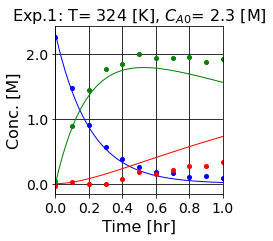

====================== Case 5 ======================
-----------Exp.: 17-----------
k1=  6.972185
k2=  0.762721


<Figure size 432x288 with 0 Axes>

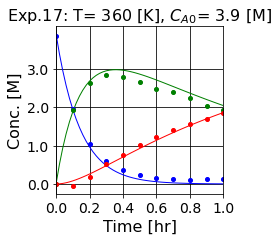

-----------Exp.: 12-----------
k1=  11.817287
k2=  1.09708


<Figure size 432x288 with 0 Axes>

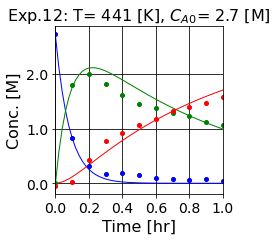

-----------Exp.: 11-----------
k1=  5.994242
k2=  0.687301


<Figure size 432x288 with 0 Axes>

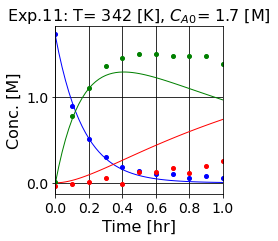

-----------Exp.: 16-----------
k1=  12.384941
k2=  1.133121


<Figure size 432x288 with 0 Axes>

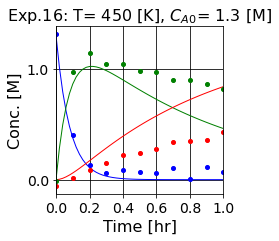

====================== Case 6 ======================
-----------Exp.: 20-----------
k1=  5.063893
k2=  0.520599


<Figure size 432x288 with 0 Axes>

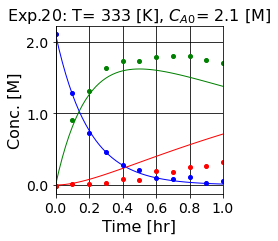

-----------Exp.: 15-----------
k1=  10.00433
k2=  1.614318


<Figure size 432x288 with 0 Axes>

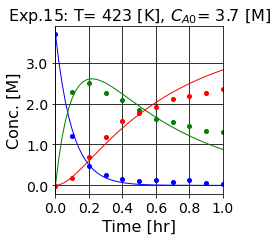

-----------Exp.: 13-----------
k1=  10.543675
k2=  1.761535


<Figure size 432x288 with 0 Axes>

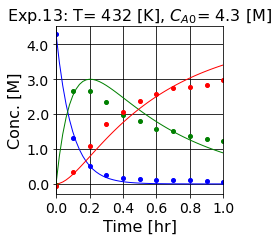

-----------Exp.: 5-----------
k1=  3.43663
k2=  0.27333


<Figure size 432x288 with 0 Axes>

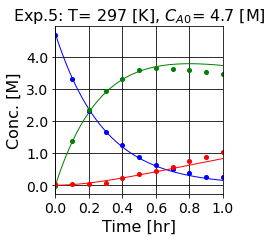

====================== Case 7 ======================
-----------Exp.: 2-----------
k1=  11.805399
k2=  1.683808


<Figure size 432x288 with 0 Axes>

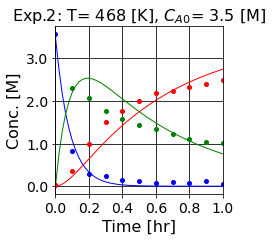

-----------Exp.: 6-----------
k1=  4.427543
k2=  0.431454


<Figure size 432x288 with 0 Axes>

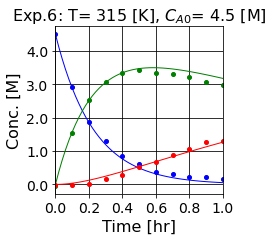

-----------Exp.: 20-----------
k1=  5.206493
k2=  0.540326


<Figure size 432x288 with 0 Axes>

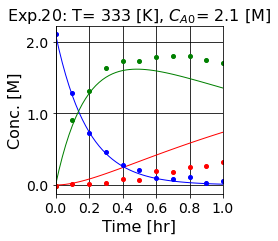

-----------Exp.: 16-----------
k1=  10.888884
k2=  1.50509


<Figure size 432x288 with 0 Axes>

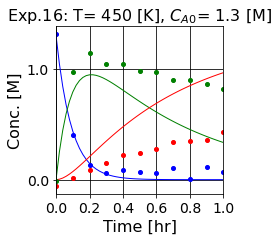

====================== Case 8 ======================
-----------Exp.: 8-----------
k1=  9.868679
k2=  1.205561


<Figure size 432x288 with 0 Axes>

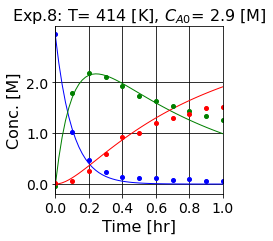

-----------Exp.: 17-----------
k1=  6.904364
k2=  0.701223


<Figure size 432x288 with 0 Axes>

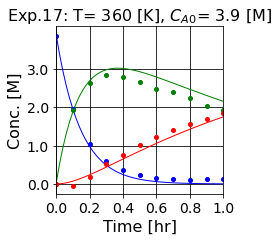

-----------Exp.: 20-----------
k1=  5.529998
k2=  0.500753


<Figure size 432x288 with 0 Axes>

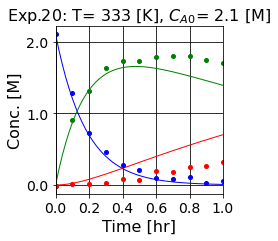

-----------Exp.: 18-----------
k1=  4.259423
k2=  0.337008


<Figure size 432x288 with 0 Axes>

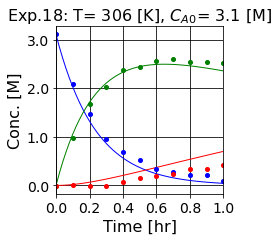

====================== Case 9 ======================
-----------Exp.: 9-----------
k1=  10.518793
k2=  0.687023


<Figure size 432x288 with 0 Axes>

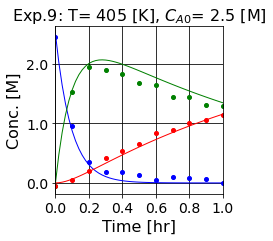

-----------Exp.: 5-----------
k1=  3.627072
k2=  0.342843


<Figure size 432x288 with 0 Axes>

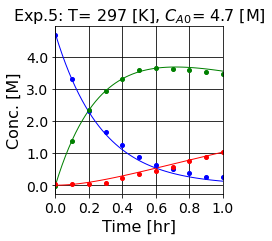

-----------Exp.: 16-----------
k1=  14.100128
k2=  0.831858


<Figure size 432x288 with 0 Axes>

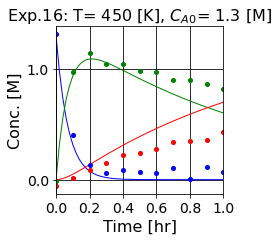

-----------Exp.: 1-----------
k1=  5.058263
k2=  0.425984


<Figure size 432x288 with 0 Axes>

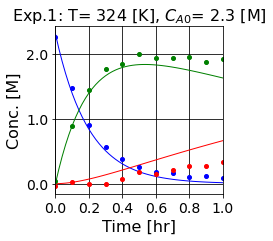

====================== Case 10 ======================
-----------Exp.: 13-----------
k1=  10.150114
k2=  1.81546


<Figure size 432x288 with 0 Axes>

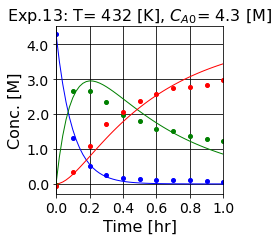

-----------Exp.: 14-----------
k1=  7.828803
k2=  0.939872


<Figure size 432x288 with 0 Axes>

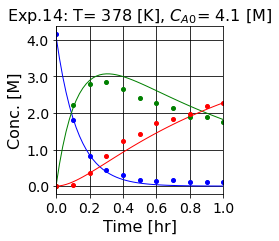

-----------Exp.: 11-----------
k1=  6.291642
k2=  0.539996


<Figure size 432x288 with 0 Axes>

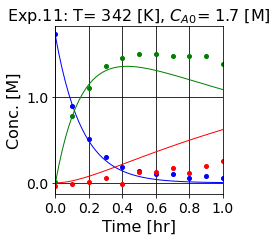

-----------Exp.: 9-----------
k1=  8.991586
k2=  1.335189


<Figure size 432x288 with 0 Axes>

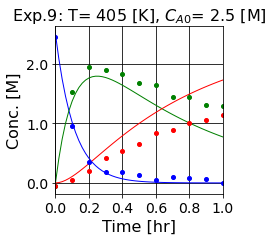

In [12]:
def set_aspect_ratio(plot, aspect_ratio):
    
        x_min, x_max = plot.get_xlim()
        y_min, y_max = plot.get_ylim()
        return plot.set_aspect(aspect_ratio * ((abs(x_max - x_min)) / (abs(y_max - y_min))))

def plot_props():

    w_in = 3. # width in inches
    h_in = 4.0 # height in inches
    dpi_fig = 1200 # pixel density in dots per inch
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(w_in,h_in))
    
    # plot simple physics model
    plt.plot(t, C[0], 'b-', label = r'$C_A$', linewidth = 1)
    plt.plot(t, C[1], 'g-', label = r'$C_B$', linewidth = 1)
    plt.plot(t, C[2], 'r-', label = r'$C_C$', linewidth = 1)
    
    # plot synthetic data
    plt.plot(t_data, CA_data, 'bo', markersize = 4)
    plt.plot(t_data, CB_data, 'go', markersize = 4)
    plt.plot(t_data, CC_data, 'ro', markersize = 4)
    
    # title, axis labels, legend
    tit = r'Exp.' + str(i) + r': T=' +T.to_string(index = False)[:4] + r' [K], $C_{A0}$=' \
    +CA0.to_string(index= False) + r' [M]'
    plt.title(tit, fontsize = 16)
    plt.xlabel(r'Time [hr]',fontsize = 16)
    plt.ylabel(r'Conc. [M]',fontsize = 16)
    
    # additional properties
    plt.xticks(np.arange(0.0,1.1,0.2))
    plt.xlim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.yticks(np.arange(0.0,C[0,0]+0.1,1))
    set_aspect_ratio(ax,1.0)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    plt.grid(color = 'k')
    plt.show()
    plt.tight_layout
    
    file = 'case_'+str(j)+'_exp_'+str(i)+'.png'    
    fig.savefig(os.path.join(path_to_fig, file), bbox_inches='tight', dpi =1200) 
    

# initialize variables
t = np.linspace(0,1,51)
C = np.zeros([3,len(t)])

for j in exp_list.case:
    print('====================== Case '+str(j)+' ======================')
    
    # create path to store figures in
    dir_name = '\simple_physics_plots\case_'+str(j)
    path_to_fig = os.getcwd()+dir_name
    
    # collect regresssed parameters for each case
    A1 = sp_params.A1[j-1]
    A2 = sp_params.A2[j-1]
    E1 = sp_params.E1[j-1]
    E2 = sp_params.E2[j-1]
    θ = np.array([A1,A2,E1,E2])
    
    # read in which experiments of case study
    exp = np.array([exp_list.set_1[j-1],exp_list.set_2[j-1],exp_list.set_3[j-1],exp_list.set_4[j-1]])

    for i in exp:
        # collect control variables for each experiment
        i = int(i)
        ctrl_vars = controls.loc[controls['exp'] == i]
        CA0 = ctrl_vars.CA0
        T = ctrl_vars.temp
        
        print('-----------Exp.: '+str(i)+'-----------')
        k1 = rxn.kinetics(θ[0], θ[2],T).to_string(index = False)
        k2 = rxn.kinetics(θ[1], θ[3],T).to_string(index = False)
        print('k1=',k1)
        print('k2=',k2)
        
        for k in np.arange(0,len(t)):
            # run simple physics model for each points in time
            C[:,k] = rxn.simple_physics_model(θ,t[k],CA0,T)
        
        # plot concentrations vs. time
        t_data = dict["rxn_exp_"+str(i-1)+".csv"].time
        CA_data = dict["rxn_exp_"+str(i-1)+".csv"].CA
        CB_data = dict["rxn_exp_"+str(i-1)+".csv"].CB
        CC_data = dict["rxn_exp_"+str(i-1)+".csv"].CC
        
        plot_props()

### Parameter 1

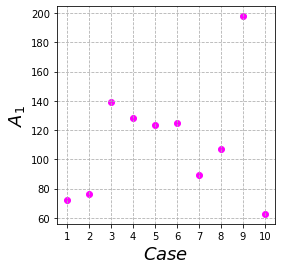

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.grid(linestyle = '--')
plt.xticks(sp_params.case)
plt.scatter(sp_params.case, sp_params.A1, color = 'magenta')
plt.xlabel(r'$Case$')
plt.ylabel(r'$A_1$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable = 'box')

plt.savefig("A1_vs_case.png")

### Parameter 2

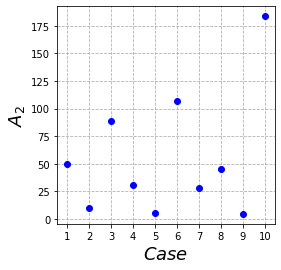

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.grid(linestyle = '--')
plt.xticks(sp_params.case)
plt.plot(sp_params.case, sp_params.A2, "o", color = "blue")
plt.xlabel(r'$Case$')
plt.ylabel(r'$A_2$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable = 'box')
plt.savefig("A2_vs_case.png")

### Parameter 3

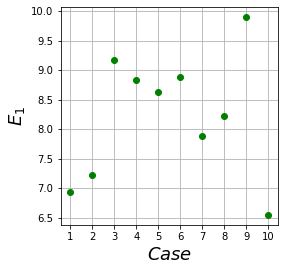

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.grid(which = 'major', linestyle = '-')
plt.grid(which = 'minor', linestyle = '--')
plt.xticks(sp_params.case)
plt.plot(sp_params.case, sp_params.E1, "o", color = "green")
plt.xlabel(r'$Case$')
plt.ylabel(r'$E_1$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable = 'box')
plt.savefig("E1_vs_case.png")

### Parameter 4

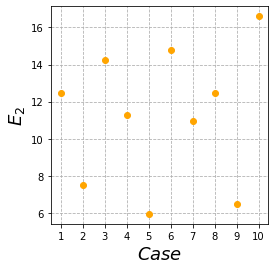

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.grid(linestyle = '--')
plt.xticks(sp_params.case)
plt.plot(sp_params.case, sp_params.E2, "o", color = "orange")
plt.xlabel(r'$Case$')
plt.ylabel(r'$E_2$')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable = 'box')
plt.savefig("E2_vs_case.png")

## Load case covariance matrices
$\vec{C}=\left[ \matrix{C_A \\ C_B \\ C_C} \right ] 
=f(C_{A0}, T, t, \hat{\vec{\theta}})$

Regression gives us:

$\hat{\vec{\theta}} = [\hat{A_1}, \hat{A_2}, \hat{E_1}, \hat{E_2}]$

$\Sigma_{\hat{\vec{\theta}}} = \left [ \matrix{ 
\sigma_{A_1}^2 & \sigma_{A1}\sigma_{A2} & ... \\
\sigma_{A_2}\sigma_{A_1} & \ddots &  \\
\vdots & & \\
} \right ]$

In [18]:
#come back to this later
# cwd = os.getcwd()
# path = os.path.join(cwd,'cov_mats_sp')

# csv_files = glob.glob(os.path.join(path,"*.csv"))
# dict = {}

# # loop over the list of csv files
# for f in csv_files:
    
#     # collect file name
#     file_name =  f.split("\\")[-1]
    
#     # read in .csv
#     df = pd.read_csv(f, header = None).transpose()
#     df = df.rename(columns = {0: 'A1', 1: 'A2', 2: 'E1', 3:'E2'}, index = {0: 'A1', 1: 'A2', 2: 'E1', 3:'E2'})
        
#     # save dataframe to dictionary w/ key file_name
#     key = file_name
#     dict[key] = df

# # Example of output
# dict['cov_mat_simple_physics_1.csv']

## Estimate uncertainty in $\hat{\vec{C}}$ induced by uncertainty in $\hat{\vec{\theta}}$

$\Sigma_{\hat{\vec{C}}} = \left [ \matrix{ 
\sigma_{C_A}^2 & \sigma_{C_A}\sigma_{C_B} & ... \\
\sigma_{C_B}\sigma_{C_A} & \ddots &  \\
\vdots & & \\
} \right ]= \frac{\partial f}{\partial \theta} \Sigma_{\hat{\vec{\theta}}} \left [\frac{\partial f}{\partial \theta} \right ]^T
$


$\frac{\partial f}{\partial \theta_i} \approx \frac{f(C_{A0}, \:T,\: t,\: \vec{\hat{\theta}} + \epsilon e_i) - f(C_{A0}, \:T,\: t,\: \vec{\hat{\theta}} - \epsilon e_i)}{2 \epsilon}$

In [19]:
#ϵ = 1e-3
#e = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

# initialize variables
#t = np.linspace(0,1,51)
#C = np.zeros([3,len(t)])

#dfdθ = np.zeros([3, len(θ)]) 

# param = np.zeros(4)
# for i in θ:
#     param[i] = ϵ*θ[i,:]

#print(dfdθ)

#for i in np.arange(0,len(θ)):
#    dfdθ[:,i] = 1